In [211]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [213]:
df = pd.read_csv("C:/Users/user/Desktop/Data.csv") 

In [215]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [217]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [219]:
X = df.drop(["Sample code number","Mitoses"],  axis=1)
y = df["Class"]

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [223]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [225]:
y_pred = model.predict(X_test)

In [227]:
print("To‘g‘rilik (accuracy):", accuracy_score(y_test, y_pred))
print("Batafsil hisobot:\n", classification_report(y_test, y_pred))


To‘g‘rilik (accuracy): 1.0
Batafsil hisobot:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        79
           4       1.00      1.00      1.00        58

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



In [229]:
accuracy = accuracy_score(y_test, y_pred)
print("Modelning aniqligi (Accuracy):", accuracy)

Modelning aniqligi (Accuracy): 1.0


In [231]:
print("\nKlassifikatsiya hisobot:")
print(classification_report(y_test, y_pred))



Klassifikatsiya hisobot:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        79
           4       1.00      1.00      1.00        58

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



In [233]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(conf_matrix)


Confusion matrix:
[[79  0]
 [ 0 58]]


In [235]:
conf_matrix = confusion_matrix(y_test, y_pred)

<Axes: >

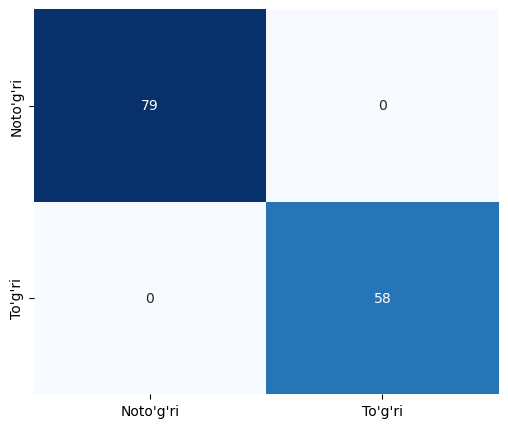

In [237]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["Noto'g'ri", "To'g'ri"], yticklabels=["Noto'g'ri", "To'g'ri"])


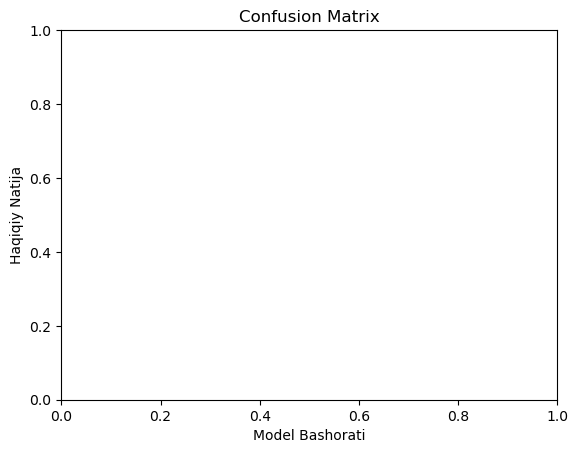

In [239]:
plt.title("Confusion Matrix")
plt.xlabel("Model Bashorati")
plt.ylabel("Haqiqiy Natija")
plt.show()

In [241]:
cv_scores = cross_val_score(model, X, y, cv=10)
print("Cross-validation aniqligi: ", np.mean(cv_scores))

Cross-validation aniqligi:  0.9985507246376812


In [243]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [245]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)